In [3]:
import os
from glob import glob

import numpy as np
import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# 현재 경로
os.getcwd()

'C:\\Users\\user\\Study\\fastcampus\\DL\\3. Tensorflow Pytorch를 활용한 이미지 분석'

In [31]:
# listdir : 해당 경로에 있는 file return
mnist_data_path = '../dataset/mnist_png/'
os.listdir(mnist_data_path + 'training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [33]:
data_paths = glob(mnist_data_path+ 'training/*/*.png')

print(len(data_paths))
path = data_paths[0]
path

60000


'../dataset/mnist_png/training\\0\\1.png'

### Data Analysis (MNIST)

In [34]:
# label
label_nums = os.listdir(mnist_data_path + 'training/')

label_nums, len(label_nums)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10)

#### 데이터 별 갯수 비교

In [38]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir(mnist_data_path + 'training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

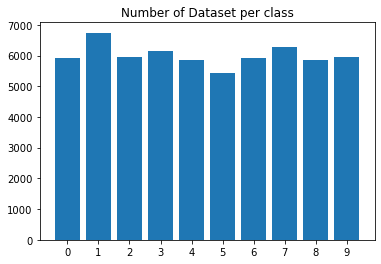

In [39]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

### Pilow로 Image 열기

(28, 28)


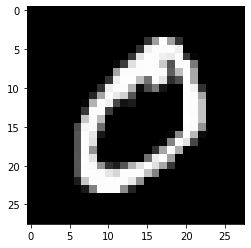

In [45]:
image_pil = Image.open(path)
image = np.array(image_pil)

print(image.shape)

plt.imshow(image, 'gray')
plt.show()

### Tensorflow로 image 열기

(28, 28, 1)


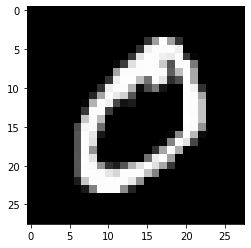

In [57]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

print(image.shape)

# plt.imshow(image[:,:,0], 'gray')
plt.imshow(image, 'gray')
plt.show()

### Label

In [65]:
def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

path, get_label(path)

('../dataset/mnist_png/training\\0\\1.png', 0)

### Data image size

In [71]:
from tqdm import tqdm_notebook

for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-71-6370f782ec94>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(data_paths):


[28] [28]


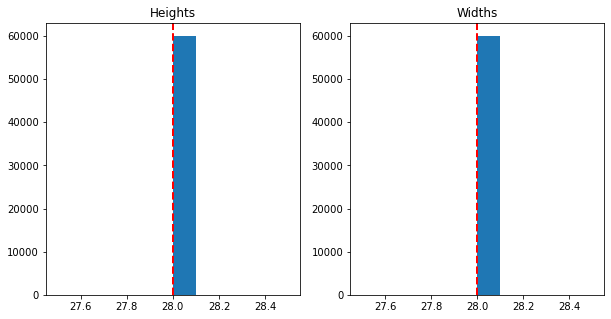

In [80]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), 
            color='r', 
            linestyle='dashed',
            linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), 
            color='r', 
            linestyle='dashed',
            linewidth=2)


print(np.unique(heights), np.unique(widths))

plt.show()